# Regressione lineare semplice

In questo Notebook vedremo un esempio di regressione lineare utilizzando il **Boston Housing Dataset** per predirre il valore di abitazioni nella zona di Boston.

Trattandosi di una regressione lineare **semplice**, utilizzeremo **una variabile** del dataset per provare a predirne un'altra.

Importo le librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Come **predittore** utilizzeremo il **numero di stanze** (RM - colonna 5) per predirre il valore medio (**MEDV** - colonna 13). Le colonne del dataset sono divise da un numero variabile di spazi, in questi casi dobbiamo usare come separatore \s+.

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', usecols=[5,13], names=["RM", "MEDV"])
dataset.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


#### Ci sono valori nulli ?

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


No, non ce ne sono.

#### Riportiamo i valori sulla stessa scala ?

Trattandosi di un solo predittore, non è necessario normalizzare/standardizzare.

#### Regressione Lineare

Utilizzo la funzione *train_test_split* di scikit-learn per creare il **train set** e il **test set**.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dataset.drop("MEDV", axis=1)
Y = dataset["MEDV"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

Adesso possiamo procedere.

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()        # lr è il predittore
lr.fit(X_train, Y_train)       # vado ad allenare il predittore sul train set
Y_pred = lr.predict(X_test)    # utilizzo il modello allenato per predire la variabile dipendente nel test set

Utilizziamo la predizione del modello per calcolare l'errore utilizzando l'**errore quadratico medio** (MSE - Mean Squared Error).

$ MSE = \Large\frac{1}{N} \displaystyle\sum_{i=1}^N (Y-\hat Y)^2 $

dove $\hat{Y}$ corrisponde alla predizione del modello.

In [11]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

38.9831529313752

Vediamo un' ulteriore metrica per valutare modello utilizzato: il **coefficente di determinazione** ($R^2$).


$$ R^2 = 1-\frac{RSS}{SST}$$

dove $RSS$ è la somma dei quadrati residui:

$$RSS = \sum_{i=1}^{N}(Y_i-\hat{Y}_i)^2$$

ed SST è la somma dei quadrati totali:

$$SST = \sum_{i=1}^{N}(Y_i-Y_{mean})^2$$

in pratica $R^2$ è una versione standardizzata del MSE che torna un punteggio compreso tra 0 e 1 per il train set, mentre per il test set può assumere anche valori negativi. 

**NOTA BENE** R^2 non è una funzione di costo, ma di punteggio, un valore di 1 vuol dire che la predizione del modello è sempre corretta ( cosa improbabile in casi reali ). Quindi tanto più vicino ad 1 è l'R2 tanto migliore è il modello.

* **R2_score < 0.3** il modello è inutile.
* **0.3 < R2_score < 0.5** il modello è scarso.
* **0.5 < R2_score < 0.7** il modello è discreto.
* **0.7 < R2_score < 0.9** il modello è buono.
* **0.9 < R2_score < 1** il modello è ottimo.
* **R2_score = 1** molto probabilmente c'è un errore nel modello.

In [12]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.5287370547088277

Il punteggio non è così male per un modello così semplice.

Proviamo a visualizzare il tutto.

Peso di RM: 8.827409442318743
Bias: -32.64268241259265


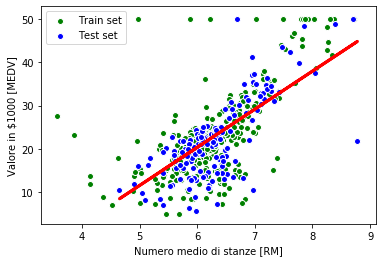

In [13]:
print("Peso di RM: "+ str(lr.coef_[0]))
print("Bias: "+str(lr.intercept_))


plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

plt.xlabel('Numero medio di stanze [RM]')
plt.ylabel('Valore in $1000 [MEDV]')

plt.legend(loc='upper left')

plt.plot(X_test, Y_pred, color='red', linewidth=3)

La retta approssima i dati abbastanza bene, l'errore alto è dato in gran parte dagli **outliers**, ovvero dai valori che si distaccano di molto dagli altri.
Per ottenere un modello più preciso, e quindi ridurre l'errore, dovremmo aggiungere ulteriori features significative, ovvero passa alla **regressione lineare multipla**.